In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from scipy import stats as st
import os

In [2]:
df = pd.read_csv('datasets/games.csv')

In [3]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [4]:
# Так наглядней чем df.columns
for column in df.columns:
    print(column)

Name
Platform
Year_of_Release
Genre
NA_sales
EU_sales
JP_sales
Other_sales
Critic_Score
User_Score
Rating


In [5]:
df.columns = df.columns.map(lambda x: x.lower())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
df['year_of_release'].isna().sum()

269

Изучим записи, которые содержат пропуски в поле `year_of_release`. Таких записей 269, что от общего числа:

In [9]:
df['year_of_release'].isna().sum() / len(df)

0.01609332934489979

Чуть больше процента. Впринципе, таким колличеством мрожно и принебречь. Но, всё таки взглянем на них:

In [10]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df[df['year_of_release'].isna()]['genre'].value_counts().sort_values(ascending=False)

Action          62
Sports          42
Misc            29
Shooter         27
Racing          23
Role-Playing    17
Simulation      16
Fighting        12
Puzzle          11
Adventure       10
Platform        10
Strategy        10
Name: genre, dtype: int64

Можно заметить, что большенство из таких игр – это спортивные симуляторы (221 например –  это футбол). И они содержат год в названии

In [12]:
df[(~df['year_of_release'].isna()) & (df['name'].str.contains('Soccer'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E
190,FIFA Soccer 13,X360,2012.0,Action,1.09,3.47,0.03,0.57,90.0,6.1,E
202,FIFA Soccer 11,PS3,2010.0,Sports,0.61,3.28,0.06,1.12,89.0,8,E
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E
274,FIFA Soccer 06,PS2,2005.0,Sports,0.78,2.55,0.04,0.84,80.0,7.8,E
...,...,...,...,...,...,...,...,...,...,...,...
16033,FIFA Soccer 08,PC,2007.0,Sports,0.00,0.01,0.00,0.00,77.0,6.1,E
16060,Worldwide Soccer Manager 2006,PC,2004.0,Sports,0.00,0.01,0.00,0.00,89.0,NaN,E
16176,Fab 5 Soccer,DS,2008.0,Sports,0.01,0.00,0.00,0.00,NaN,tbd,E
16528,Pro Evolution Soccer 2010,PC,2009.0,Sports,0.00,0.01,0.00,0.00,78.0,6.9,E


Причём, нельзя просто так взять эту цифру и заполнить ей пропушенные значения, потому что:
<ol>
    <li>Где-то в названии игры год указан четырех значным числом (2011), а где-то двух значным (11)
    <li>В большенстве названий указан следующий год после выхода игры
    <li>Где-то год указан в скобках
<ol><br>
Всё это надо учесть

In [13]:
df.loc[(~df['year_of_release'].isna()) & (df['name'].str.contains('20'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E
283,Madden NFL 2003,PS2,2002.0,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E
333,Mario & Sonic at the London 2012 Olympic Games,Wii,2011.0,Sports,1.12,1.87,0.27,0.45,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16638,Tour de France 2014,PS3,2014.0,Sports,0.00,0.01,0.00,0.00,NaN,tbd,E
16658,Driving Simulator 2011,PC,2011.0,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN


В первую очередь обработаем записи, где год указан четырехзначным числом.<br>
Посмотрим на них:

In [14]:
df[
        (df['year_of_release'].isna())
        &
        (df['name'].str.contains('20'))
    ]['name']\
        .str.split(' ')

183                          [Madden, NFL, 2004]
377                         [FIFA, Soccer, 2004]
475             [wwe, Smackdown, vs., Raw, 2006]
1650                     [NASCAR, Thunder, 2003]
2492                      [MLB, SlugFest, 20-03]
2572        [PES, 2009:, Pro, Evolution, Soccer]
3486                         [Madden, NFL, 2002]
4775                        [NFL, GameDay, 2003]
5156                           [NBA, Live, 2003]
5336                      [Tomb, Raider, (2013)]
5655                  [All-Star, Baseball, 2005]
5889                           [NBA, Live, 2003]
6954                                  [Jet, X20]
8918                  [All-Star, Baseball, 2005]
13195                   [Tour, de, France, 2011]
13929                        [Sega, Rally, 2006]
15953    [PDC, World, Championship, Darts, 2008]
16079                  [Football, Manager, 2007]
16373    [PDC, World, Championship, Darts, 2008]
Name: name, dtype: object

Вручную обработаем совсем уж выбивающиеся значения (их всего два):

In [15]:
df.loc[(df['year_of_release'].isna())  & (df['name'] == 'PES 2009: Pro Evolution Soccer'), 'year_of_release'] = 2009
df.loc[(df['year_of_release'].isna())  & (df['name'] == 'Jet X20'), 'year_of_release'] = 0 # Год всё равно неизвестен

Остальное обработаем автоматически

In [16]:
df.loc[(df['year_of_release'].isna())  & (df['name'].str.contains('20')), 'year_of_release'] = \
df[(df['year_of_release'].isna()) & (df['name'].str.contains('20'))]['name'].str.split(' ').map(lambda x: int(x[-1] \
                                                                     .replace('-', '') \
                                                                     .replace('(', '') \
                                                                     .replace(')', ''))-1)

Теперь обработаем записи, где год указан двухзначным числом

In [17]:
# df.loc[df['year_of_release'].isna(), 'year_of_release'] = \
df.loc[(df['year_of_release'].isna())]['name'].str.split(' ').map(lambda x: '20'+str(int(x[-1])-1 )if len(x[-1])==2 and x[-1].isdigit() else 0)

456      0
609      0
627      0
657      0
678      0
        ..
16348    0
16405    0
16448    0
16458    0
16522    0
Name: name, Length: 250, dtype: object

In [18]:
df[df['name'] == 'PES 2009: Pro Evolution Soccer' ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
617,PES 2009: Pro Evolution Soccer,PS2,2008.0,Sports,0.13,0.07,0.26,2.05,NaN,NaN,NaN
783,PES 2009: Pro Evolution Soccer,PS3,2008.0,Sports,0.11,1.33,0.40,0.26,NaN,NaN,NaN
2068,PES 2009: Pro Evolution Soccer,X360,2008.0,Sports,0.13,0.76,0.03,0.09,NaN,NaN,NaN
2572,PES 2009: Pro Evolution Soccer,PSP,2009.0,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
4329,PES 2009: Pro Evolution Soccer,Wii,2009.0,Sports,0.09,0.26,0.05,0.05,NaN,NaN,NaN


Т.к. на данном этапе без детального исследования не понятно, можно ли данные с пропусками удалить и какая причина пропуска или закономерность.<br>
заменим пропуски года релиза игры на 0. А потом при необходимости заменим это значение или удалим строки с этим значением<br>

In [19]:
df['year_of_release'].fillna(0, inplace=True)
# Преведём данные следующих столбцов к формату int
df['year_of_release'] = df['year_of_release'].astype('int')

In [20]:
len(df[df['user_score'] == 'tbd'])

2424

In [21]:
# TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

In [22]:
df['user_score'] = df['user_score'].map(lambda  x: x.replace('tbd', 'NaN') if x=='tbd' else x)
df['user_score'] = df['user_score'].astype('float')

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

<AxesSubplot: xlabel='year_of_release'>

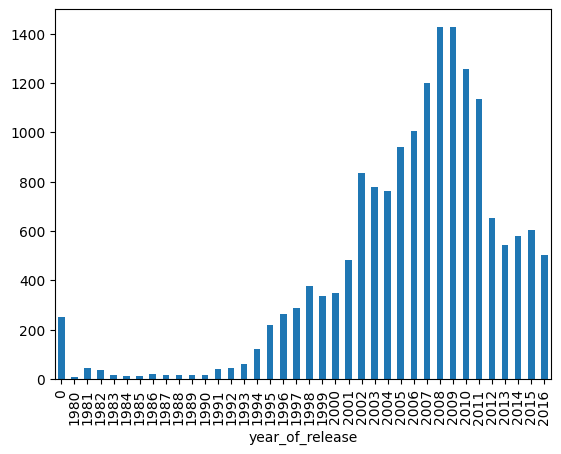

In [24]:
df.groupby('year_of_release')['name'].count().plot.bar()